In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [2]:
stunting = pd.read_stata("data/stunting_projections_2030.dta")

In [3]:
stunting.head()

,iso3,country,urban,year,ssp,cc,st_mod,st_svr,del_price,wb_region,cc_iiasa_code
0,BOL,Bolivia,rural,2030,4,noCC/noMitig,26.833092,4.759212,0.062550,LAC,B
1,BTN,Bhutan,rural,2030,4,noCC/noMitig,23.759518,12.721236,0.101660,SAR,B
2,BIH,Bosnia and Herzegovina,urban,2030,4,noCC/noMitig,3.223212,5.918296,0.000947,ECA,B
3,MRT,Mauritania,rural,2030,4,noCC/noMitig,17.551910,4.698732,0.261497,SSA,B
4,PER,Peru,urban,2030,4,noCC/noMitig,12.706117,0.308090,0.062550,LAC,B


In [4]:
stunting.cc.unique()

array(['noCC/noMitig', '2p6/CO2fert', '8p5/noCO2fert', '8p5/CO2fert'], dtype=object)

In [5]:
stunting.year.unique()

array([ 2030.])

In [6]:
sort_inx = ["iso3","urban","ssp"]

In [8]:
diff_mod = (stunting.query("cc=='8p5/noCO2fert'").set_index(sort_inx)["st_mod"]-\
stunting.query("cc=='noCC/noMitig'").set_index(sort_inx)["st_mod"]).reset_index()

diff_svr = (stunting.query("cc=='8p5/noCO2fert'").set_index(sort_inx)["st_svr"]-\
stunting.query("cc=='noCC/noMitig'").set_index(sort_inx)["st_svr"]).reset_index()

In [11]:
diff_mod.ix[(diff.ssp==4)&(diff.urban=='rural'),"st_mod"].describe()

count    63.000000
mean      0.028967
std       0.065156
min      -0.114403
25%       0.034227
50%       0.037487
75%       0.068581
max       0.101841
Name: st_mod, dtype: float64

In [10]:
diff_svr.ix[(diff.ssp==4)&(diff.urban=='rural'),"st_svr"].describe()

count    63.000000
mean      0.013246
std       0.032359
min      -0.084911
25%       0.003011
50%       0.022154
75%       0.036652
max       0.066502
Name: st_svr, dtype: float64

In [13]:
diff.ix[(diff.ssp==5)&(diff.urban=='urban')&(diff_mod.st_mod>1.0),:]

,iso3,urban,ssp,st_mod


In [129]:
food_shares = pd.read_csv("data/share_conso_2010.csv")

In [130]:
food_shares.head()

,Area,Consumption Segment,Country,Sector,data
0,National,Higher,Afghanistan,Others,0.082465
1,National,Higher,Afghanistan,Financial Services,0.000000
2,National,Higher,Afghanistan,ICT,0.013655
3,National,Higher,Afghanistan,Personal Care,0.013018
4,National,Higher,Afghanistan,Health,0.023519


In [131]:
food_shares.Sector.unique()

array(['Others', 'Financial Services', 'ICT', 'Personal Care', 'Health',
       'Education   ', 'Water Utility', 'Transport', 'Energy', 'Housing',
       'Clothing and Footwear', 'Food and Beverages', 'All Sectors'], dtype=object)

In [132]:
food_shares.Area.unique()

array(['National', 'Rural', 'Urban'], dtype=object)

In [133]:
food_shares["Consumption Segment"].unique()

array(['Higher', 'Middle', 'Low', 'Lowest', 'All'], dtype=object)

In [2]:
codes = pd.read_csv("wbccodes2014.csv")

In [135]:
food_shares = food_shares.merge(codes[["country_name","country","wbregion"]],how='inner',left_on='Country',right_on='country_name')

In [142]:
segments=pd.DataFrame(columns=["Consumption Segment","income","consSeg"])
segments.loc[len(segments),:]=["Lowest",0,"0-2.97"]
segments.loc[len(segments),:]=["Low",2.97,"2.97-8.44"]
segments.loc[len(segments),:]=["Middle",8.44,"8.44-23.03"]
segments.loc[len(segments),:]=["Higher",23.03,">23.03"]

In [143]:
segments=segments.set_index("Consumption Segment")

In [144]:
food_shares["segment"]=food_shares["Consumption Segment"].replace(segments.income)
food_shares["consSeg"]=food_shares["Consumption Segment"].replace(segments.consSeg)
set([c for c in food_shares.segment if c not in segments.income.unique()])

set()

In [139]:
food_shares = food_shares.ix[(food_shares.segment!="All")&(food_shares.Sector=='Food and Beverages')\
                             &(food_shares.Area=="National"),:]

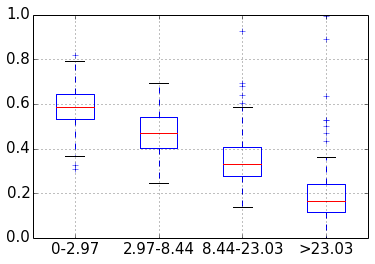

In [145]:
food_shares[["consSeg","data","Country"]].pivot_table(columns="consSeg",values="data",index="Country").plot(kind="box")
plt.savefig("share_of_food_vs_incomecat.png",dpi=100)

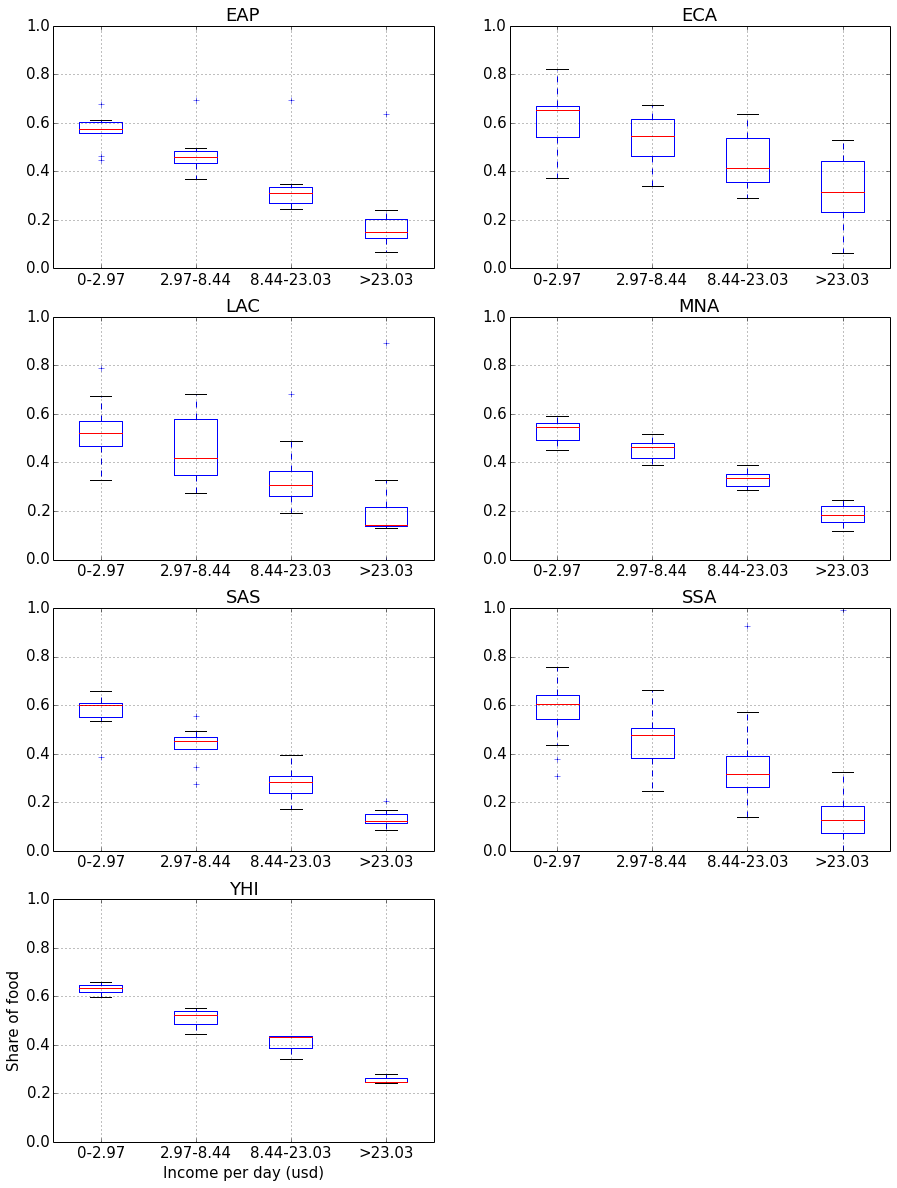

In [150]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(15,20))
grouped = food_shares.groupby("wbregion")
for i,(name,group) in enumerate(grouped):
    ax = plt.subplot(4,2,i+1)
    group[["consSeg","data","Country"]].pivot_table(columns="consSeg",values="data",index="Country").plot(kind="box",ax=ax)
    ax.set_ylim([0,1])
    plt.title(name)
    
plt.xlabel("Income per day (usd)")
plt.ylabel("Share of food")
plt.savefig("share_of_food_vs_incomecat.png",dpi=100)

In [160]:
food_shares.groupby(["wbregion","consSeg"]).apply(lambda x:np.median(x.data)).reset_index().to_csv("data/food_shares_wbreg.csv",index=False)

In [3]:
malaria = pd.read_csv("data/malaria_PAR_by_country.csv")

In [4]:
malaria=malaria.ix[malaria["RATIO AVG 1980-2010"]!=-9999.00000,:]

In [5]:
malaria.COUNTRY = [s.strip() for s in malaria.COUNTRY]

In [6]:
malaria = malaria.merge(codes[["country_name","country","wbregion"]],how='inner',left_on='COUNTRY',right_on='country_name')

In [28]:
malaria.head()

,COUNTRY,RATIO AVG 1980-2010,RATIO RCP2.6 AVG 2020s,RATIO RCP2.6 AVG 2050s,RATIO RCP8.5 AVG 2020s,RATIO RCP8.5 AVG 2050s,country_name,country,wbregion
0,Afghanistan,2.27294,2.89683,3.27287,2.79952,3.70210,Afghanistan,AFG,SAS
1,Albania,12.10130,15.53260,16.86220,16.51340,18.63500,Albania,ALB,ECA
2,Algeria,3.80366,4.96170,5.55649,4.96309,5.92708,Algeria,DZA,MNA
3,Angola,81.38840,90.82300,94.14820,91.95460,97.10350,Angola,AGO,SSA
4,Argentina,34.81090,40.08500,42.21680,41.99310,44.08850,Argentina,ARG,LAC


In [7]:
malaria["diff 2020s"]=malaria['RATIO RCP8.5 AVG 2020s']-malaria['RATIO RCP2.6 AVG 2020s']
malaria["diff 2050s"]=malaria['RATIO RCP8.5 AVG 2050s']-malaria['RATIO RCP2.6 AVG 2050s']

In [37]:
from scipy.interpolate import interp1d

malaria["diff 2030"] = interp1d([2020,2050],malaria[["diff 2020","diff 2050"]])(2030)

In [8]:
malaria[["COUNTRY","diff 2020s","country","wbregion"]].to_csv("data/malaria_diff_2006-2035.csv",index=False)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   1.,   1.,   2.,   1.,   2.,   0.,   1.,   5.,
          6.,   5.,   1.,  28.,  16.,   5.,   3.,   9.,  14.,   4.,   7.,
          9.,   1.,   3.,   3.,   0.,   3.,   1.,   3.,   0.,   0.,   1.,
          3.,   2.,   0.,   1.,   0.,   1.]),
 array([-4.84396667, -4.65718333, -4.4704    , -4.28361667, -4.09683333,
        -3.91005   , -3.72326667, -3.53648333, -3.3497    , -3.16291667,
        -2.97613333, -2.78935   , -2.60256667, -2.41578333, -2.229     ,
        -2.04221667, -1.85543333, -1.66865   , -1.48186667, -1.29508333,
        -1.1083    , -0.92151667, -0.73473333, -0.54795   , -0.36116667,
        -0.17438333,  0.0124    ,  0.19918333,  0.38596667,  0.57275   ,
         0.75953333,  0.94631667,  1.1331    ,  1.31988333,  1.50666667,
         1.69345   ,  1.88023333,  2.06701667,  2.2538    ,  2.44058333,
         2.62736667,  2.81415   ,  3.00093333,  3.18771667,  3.3745    ,
 

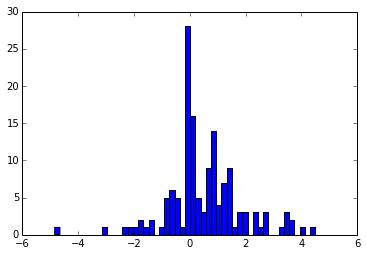

In [38]:
plt.hist(malaria["diff 2030"],bins=50)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,
          0.,   2.,   2.,   0.,   1.,   1.,   2.,   5.,   5.,   1.,   3.,
         40.,   6.,   5.,   8.,   5.,   6.,  10.,   3.,   6.,   6.,   3.,
          3.,   3.,   2.,   3.,   4.,   0.,   0.,   1.,   2.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([-10.0053  ,  -9.566938,  -9.128576,  -8.690214,  -8.251852,
         -7.81349 ,  -7.375128,  -6.936766,  -6.498404,  -6.060042,
         -5.62168 ,  -5.183318,  -4.744956,  -4.306594,  -3.868232,
         -3.42987 ,  -2.991508,  -2.553146,  -2.114784,  -1.676422,
         -1.23806 ,  -0.799698,  -0.361336,   0.077026,   0.515388,
          0.95375 ,   1.392112,   1.830474,   2.268836,   2.707198,
          3.14556 ,   3.583922,   4.022284,   4.460646,   4.899008,
          5.33737 ,   5.775732,   6.214094,   6.652456,   7.090818,
          7.52918 ,   7.967542,   8.405904,   8.844266,   9.282628,
          9.72099 ,  10.159352,  10.597714,  1

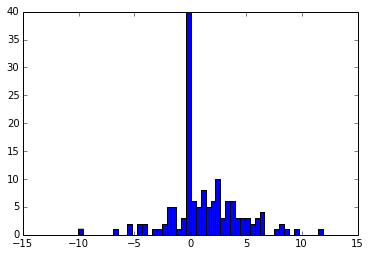

In [35]:
plt.hist(malaria["diff 2050"],bins=50)